<a href="https://colab.research.google.com/github/arkaslittlemind/Machine-Learning-ITA6016/blob/main/FAT%20LAB(03-08-2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name- Arkadipta Mojumder**

**Registration Number - 22MCA0201**

**Machine Learning FAT Lab**

Q7 Perform Exploratory data analysis for a given dataset also use simple Linear
Regression to estimate the Mileage per gallon (MPG) using Auto-MPG dataset
also use individual feature find for which feature it gives minimum possible error.

Dataset Link-


https://drive.google.com/file/d/1U7WPzADkM0osCysPsoSE1Xn4W1Aafmd/view?usp=drive_link

In [80]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict

In [62]:
data = pd.read_csv('Auto-mpg.csv')

In [63]:
data.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [64]:
data = data.set_index('car_name')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car_name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [65]:
data = data[data['horsepower'] != '?']

In [ ]:
data = data[['horsepower', 'cylinders', 'displacement', 'weight']]
data.head(9)

,horsepower,cylinders,displacement,weight
0,130,8,307.0,3504
1,165,8,350.0,3693
2,150,8,318.0,3436
3,150,8,304.0,3433
4,140,8,302.0,3449
5,198,8,429.0,4341
6,220,8,454.0,4354
7,215,8,440.0,4312
8,225,8,455.0,4425


In [68]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [70]:
data['horsepower'] = pd.to_numeric(data['horsepower'])
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [72]:
data = pd.get_dummies(data, columns=['origin'], drop_first=True)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
car_name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,0,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,0,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,0,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,0,0
ford torino,17.0,8,302.0,140,3449,10.5,70,0,0


In [74]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.173469,0.201531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.379136,0.401656
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000


In [75]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_2,origin_3
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.244313,0.451454
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.352324,-0.404209
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.371633,-0.440825
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.284948,-0.321936
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.293841,-0.447929
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.208298,0.115020
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.037745,0.199841
origin_2,0.244313,-0.352324,-0.371633,-0.284948,-0.293841,0.208298,-0.037745,1.000000,-0.230157
origin_3,0.451454,-0.404209,-0.440825,-0.321936,-0.447929,0.115020,0.199841,-0.230157,1.000000


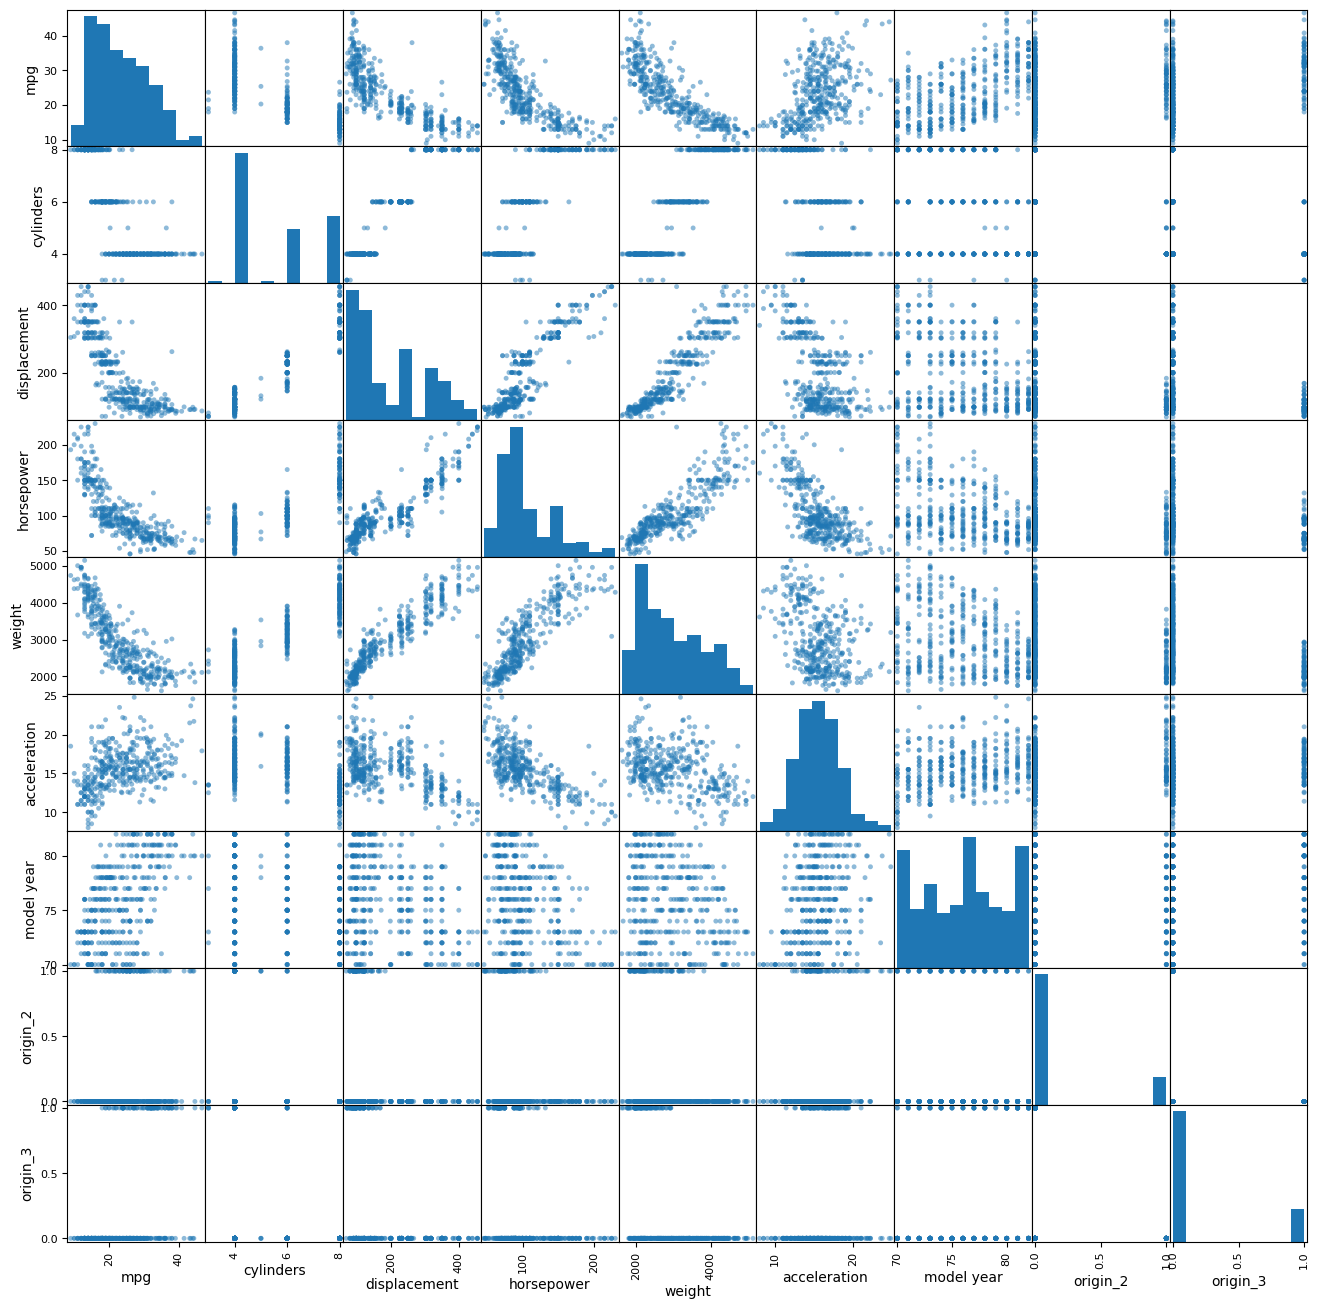

In [77]:
pd.plotting.scatter_matrix(data, s=50, hist_kwds={'bins': 10}, figsize=(16, 16));

**Data Modelling**

***Dummy Model***

Mean absolute error: 6.571514
Standard deviation of the error: 7.824518


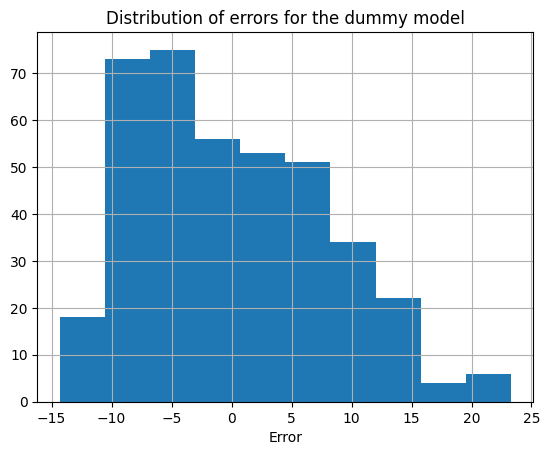

In [81]:
X = data.drop('mpg', axis='columns')  # X = features
y = data['mpg']                       # y = prediction target

model = DummyRegressor()  # Predicts the target as the average of the features

outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)  # 5 fold cross validation
y_pred = cross_val_predict(model, X, y, cv=outer_cv)        # Make predictions via cross validation

print('Mean absolute error: %f' % mean_absolute_error(y, y_pred))
print('Standard deviation of the error: %f' % (y - y_pred).std())

ax = (y - y_pred).hist()
ax.set(
    title='Distribution of errors for the dummy model',
    xlabel='Error'
);

***Linear Regression Model***

Mean absolute error: 2.588657
Standard deviation of the error: 3.383123


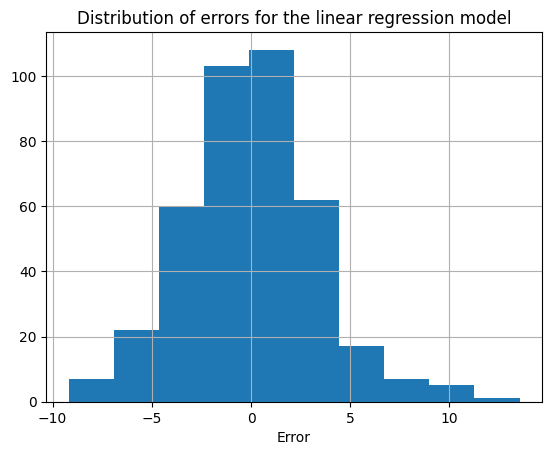

In [84]:
X = data.drop('mpg', axis='columns')  # X = features
y = data['mpg']                       # y = prediction target

model = LinearRegression(fit_intercept=True)  # Use least squares linear regression

outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)  # 5-fold cross validation
y_pred = cross_val_predict(model, X, y, cv=outer_cv)        # Make predictions via cross validation

print('Mean absolute error: %f' % mean_absolute_error(y, y_pred))
print('Standard deviation of the error: %f' % (y - y_pred).std())

ax = (y - y_pred).hist()
ax.set(
    title='Distribution of errors for the linear regression model',
    xlabel='Error'
);

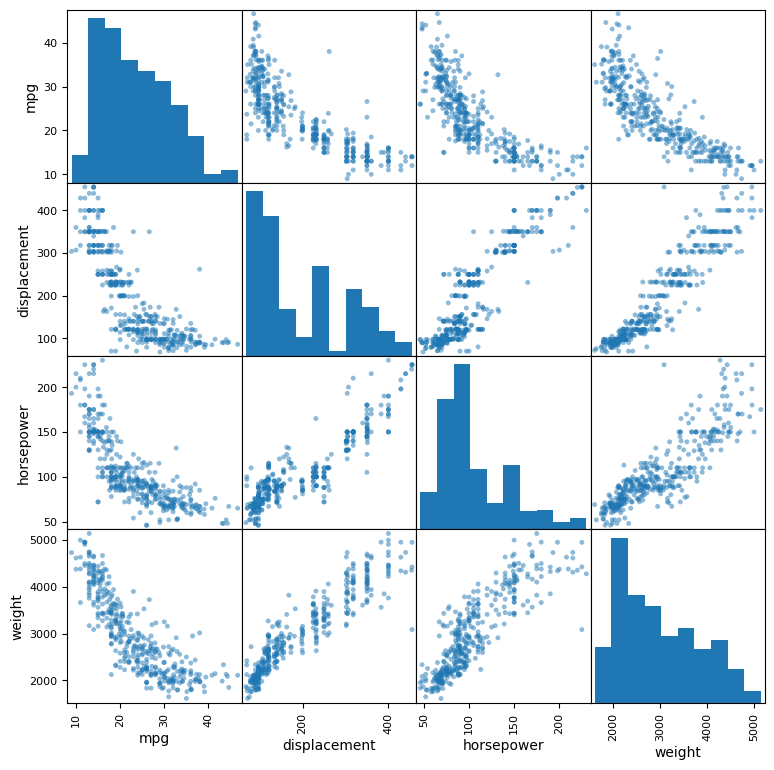

In [85]:
pd.plotting.scatter_matrix(data[['mpg', 'displacement', 'horsepower', 'weight']], s=50, figsize=(9, 9));

In [86]:
data['displacement'] = data['displacement'].map(np.log)
data['horsepower'] = data['horsepower'].map(np.log)
data['weight'] = data['weight'].map(np.log)

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='horsepower', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>],
       [<Axes: xlabel='mpg', ylabel='horsepower'>,
        <Axes: xlabel='displacement', ylabel='horsepower'>,
        <Axes: xlabel='horsepower', ylabel='horsepower'>,
        <Axes: xlabel='weight', ylabel='horsepower'>],
       [<Axes: xlabel='mpg', ylabel='weight'>,
        <Axes: xlabel='displacement', ylabel='weight'>,
        <Axes: xlabel='horsepower', ylabel='weight'>,
        <Axes: xlabel='weight', ylabel='weight'>]], dtype=object)

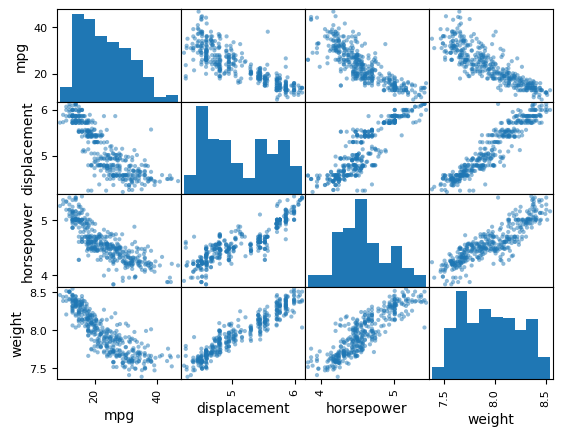

In [88]:
pd.plotting.scatter_matrix(data[['mpg', 'displacement', 'horsepower', 'weight']])

Mean absolute error: 2.334043
Standard deviation of the error: 3.125819


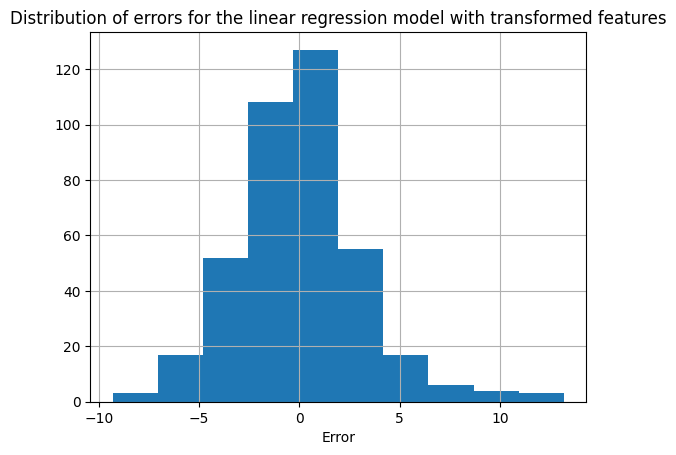

In [89]:
X = data.drop('mpg', axis='columns')
y = data['mpg']

model = LinearRegression(fit_intercept=True)

outer_cv = KFold(n_splits=5, shuffle=True, random_state=0)
y_pred = cross_val_predict(model, X, y, cv=outer_cv)

print('Mean absolute error: %f' % mean_absolute_error(y, y_pred))
print('Standard deviation of the error: %f' % (y - y_pred).std())

ax = (y - y_pred).hist()
ax.set(
    title='Distribution of errors for the linear regression model with transformed features',
    xlabel='Error'
);

***Building the final model***

In [91]:
X = data.drop('mpg', axis='columns')
y = data['mpg']

model = LinearRegression(fit_intercept=True)
model.fit(X, y)  # Fit the model using all of the data

LinearRegression()

In [92]:
print(model.intercept_)
print(model.coef_)  # Coefficients are printed in the same order as the columns i

112.3637919250463
[  0.41127054  -0.72302999  -5.52384658 -14.63576887  -0.18274907
   0.74507336   1.50694336   1.6842592 ]
